# Building and Training Neural Network Models using PyTorch - Regression

## 1. Import Libraries and Load the data:

In [1]:
# Data Manipulation libraries
import numpy as np
import pandas as pd
# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### 1.1 Load the data:

In [42]:
df = pd.read_csv('auto-mpg.csv')

In [43]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


our independant variable **horsepower** data type is object and that may be an indicator of a problem in the data let us take a closer look.

In [45]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

As expected we have '**?**' value in hourse power.

### 1.2 Impute rows with missing 'horsepower' and convert to numeric:

In [46]:
df.loc[df['horsepower'] == '?', 'horsepower'] = np.nan
df['horsepower'] = df['horsepower'].astype(float)
df.fillna({'horsepower': df['horsepower'].mean()}, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### 1.3 Select relevant columns

In [48]:
df = df[['horsepower', 'mpg']]

### 1.4 Split train and test data:

In [49]:
X = df[['horsepower']].values
y = df['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 1.5 Normalize data:

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1.6 Convert to PyTorch tensors:

In [51]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

### 1.7 Scatter plot of horsepower vs mpg:

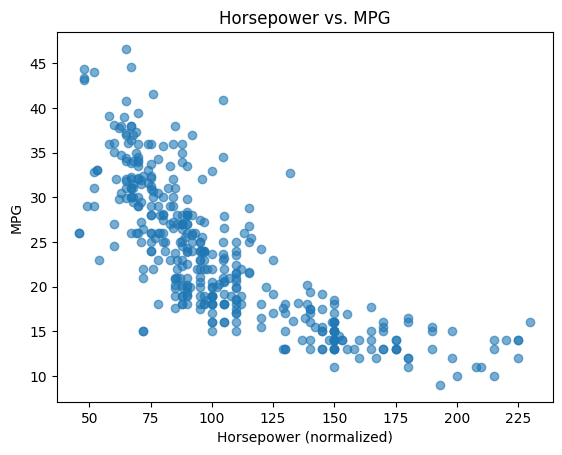

In [52]:
plt.scatter(X, y, alpha=0.6)
plt.xlabel('Horsepower (normalized)')
plt.ylabel('MPG')
plt.title('Horsepower vs. MPG')
plt.show()

## 2. Generate polynomial features for horsepower:

### 2.1 Code for generating polynomial features for specified degrees.

In [53]:
def generate_polynomial_features(X, degree):
    """Generate polynomial features up to the given degree."""
    poly_features = [X]  # Start with the original feature
    for d in range(2, degree + 1):
        poly_features.append(X**d)
    return torch.cat(poly_features, dim=1)  # Concatenate along columns

In [54]:
X_train_poly = {d: generate_polynomial_features(X_train_tensor, d) for d in range(1, 5)}
X_test_poly = {d: generate_polynomial_features(X_test_tensor, d) for d in range(1, 5)}

### 2.2 Visualizing transformed features for horsepower = 130:

In [55]:
sample_hp = torch.tensor([[130.0]])  # Example value (not normalized)
sample_hp_scaled = torch.tensor(scaler.transform(sample_hp), dtype=torch.float32)

In [56]:
print("Transformed Polynomial Features for Horsepower = 130:")
for d in range(1, 5):
    transformed_sample = generate_polynomial_features(sample_hp_scaled, d)
    print(f"Degree {d}: {transformed_sample.numpy().flatten()}")

Transformed Polynomial Features for Horsepower = 130:
Degree 1: [0.7277404]
Degree 2: [0.7277404 0.5296061]
Degree 3: [0.7277404  0.5296061  0.38541576]
Degree 4: [0.7277404  0.5296061  0.38541576 0.28048262]


## 3. Model Compilation and Training

### 3.1 Define the Regression Model:

In [57]:
class PolynomialRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(PolynomialRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer (no hidden layers)

    def forward(self, x):
        return self.linear(x)

### 3.2 Training Function:

In [81]:
def train_model(X_train, y_train, X_val, y_val, degree, reg_type=None, lambda_val=0.01, epochs=500, patience=5):
    input_dim = X_train.shape[1]  # Number of polynomial features
    model = PolynomialRegressionModel(input_dim)

    # Define loss function (MSE)
    criterion = nn.MSELoss()

    # Define optimizer (with optional L1 or L2 regularization)
    if reg_type == "L1":
        optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0)  # No built-in L1 reg
    elif reg_type == "L2":
        optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=lambda_val)  # L2 regularization
    else:
        optimizer = optim.SGD(model.parameters(), lr=0.001)

    # Early Stopping Variables
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None  # Store the best model weights

    # Training loop
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # L1 Regularization (Manually added)
        if reg_type == "L1":
            l1_reg = lambda_val * sum(torch.abs(param).sum() for param in model.parameters())
            loss += l1_reg

        loss.backward()
        optimizer.step()

        # Validation loss
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        # Early stopping check
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            patience_counter = 0
            best_model_state = model.state_dict()  # Save best model weights
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch}. Best Val Loss: {best_val_loss:.4f}")
            break  # Stop training if patience limit is reached

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

    # Load best model before returning
    model.load_state_dict(best_model_state)

    return model, train_losses, val_losses


### 3.3 Train models with different poly degrees and regularizations:

In [82]:
models = {}  # Store trained models
losses = {}  # Store training and validation losses

regularization_types = [None, "L1", "L2"]  # No Regularization, L1, L2
lambda_val = 0.01  # Regularization strength for L1 and L2

for degree in range(1, 5):
    for reg in regularization_types:
        reg_name = reg if reg else "NoReg"
        print(f"\nTraining Model for Polynomial Degree {degree} with {reg_name} Regularization...")

        model, train_losses, val_losses = train_model(
            X_train_poly[degree], y_train_tensor,
            X_test_poly[degree], y_test_tensor,
            degree, reg, lambda_val
        )

        # Store model and losses
        models[(degree, reg_name)] = model
        losses[(degree, reg_name)] = (train_losses, val_losses)


Training Model for Polynomial Degree 1 with NoReg Regularization...
Epoch 0: Train Loss = 578.4526, Val Loss = 581.2635
Epoch 100: Train Loss = 396.5054, Val Loss = 398.9677
Epoch 200: Train Loss = 274.5914, Val Loss = 276.2710
Epoch 300: Train Loss = 192.9029, Val Loss = 193.6085
Epoch 400: Train Loss = 138.1673, Val Loss = 137.8524

Training Model for Polynomial Degree 1 with L1 Regularization...
Epoch 0: Train Loss = 625.2537, Val Loss = 629.9258
Epoch 100: Train Loss = 427.9480, Val Loss = 432.1450
Epoch 200: Train Loss = 295.7566, Val Loss = 298.9742
Epoch 300: Train Loss = 207.1815, Val Loss = 209.2075
Epoch 400: Train Loss = 147.8316, Val Loss = 148.6209

Training Model for Polynomial Degree 1 with L2 Regularization...
Epoch 0: Train Loss = 634.0825, Val Loss = 636.7220
Epoch 100: Train Loss = 433.8501, Val Loss = 436.2911
Epoch 200: Train Loss = 299.7924, Val Loss = 301.5361
Epoch 300: Train Loss = 210.0157, Val Loss = 210.8313
Epoch 400: Train Loss = 149.8739, Val Loss = 149.

### 3.4 Plot Loss Curves:

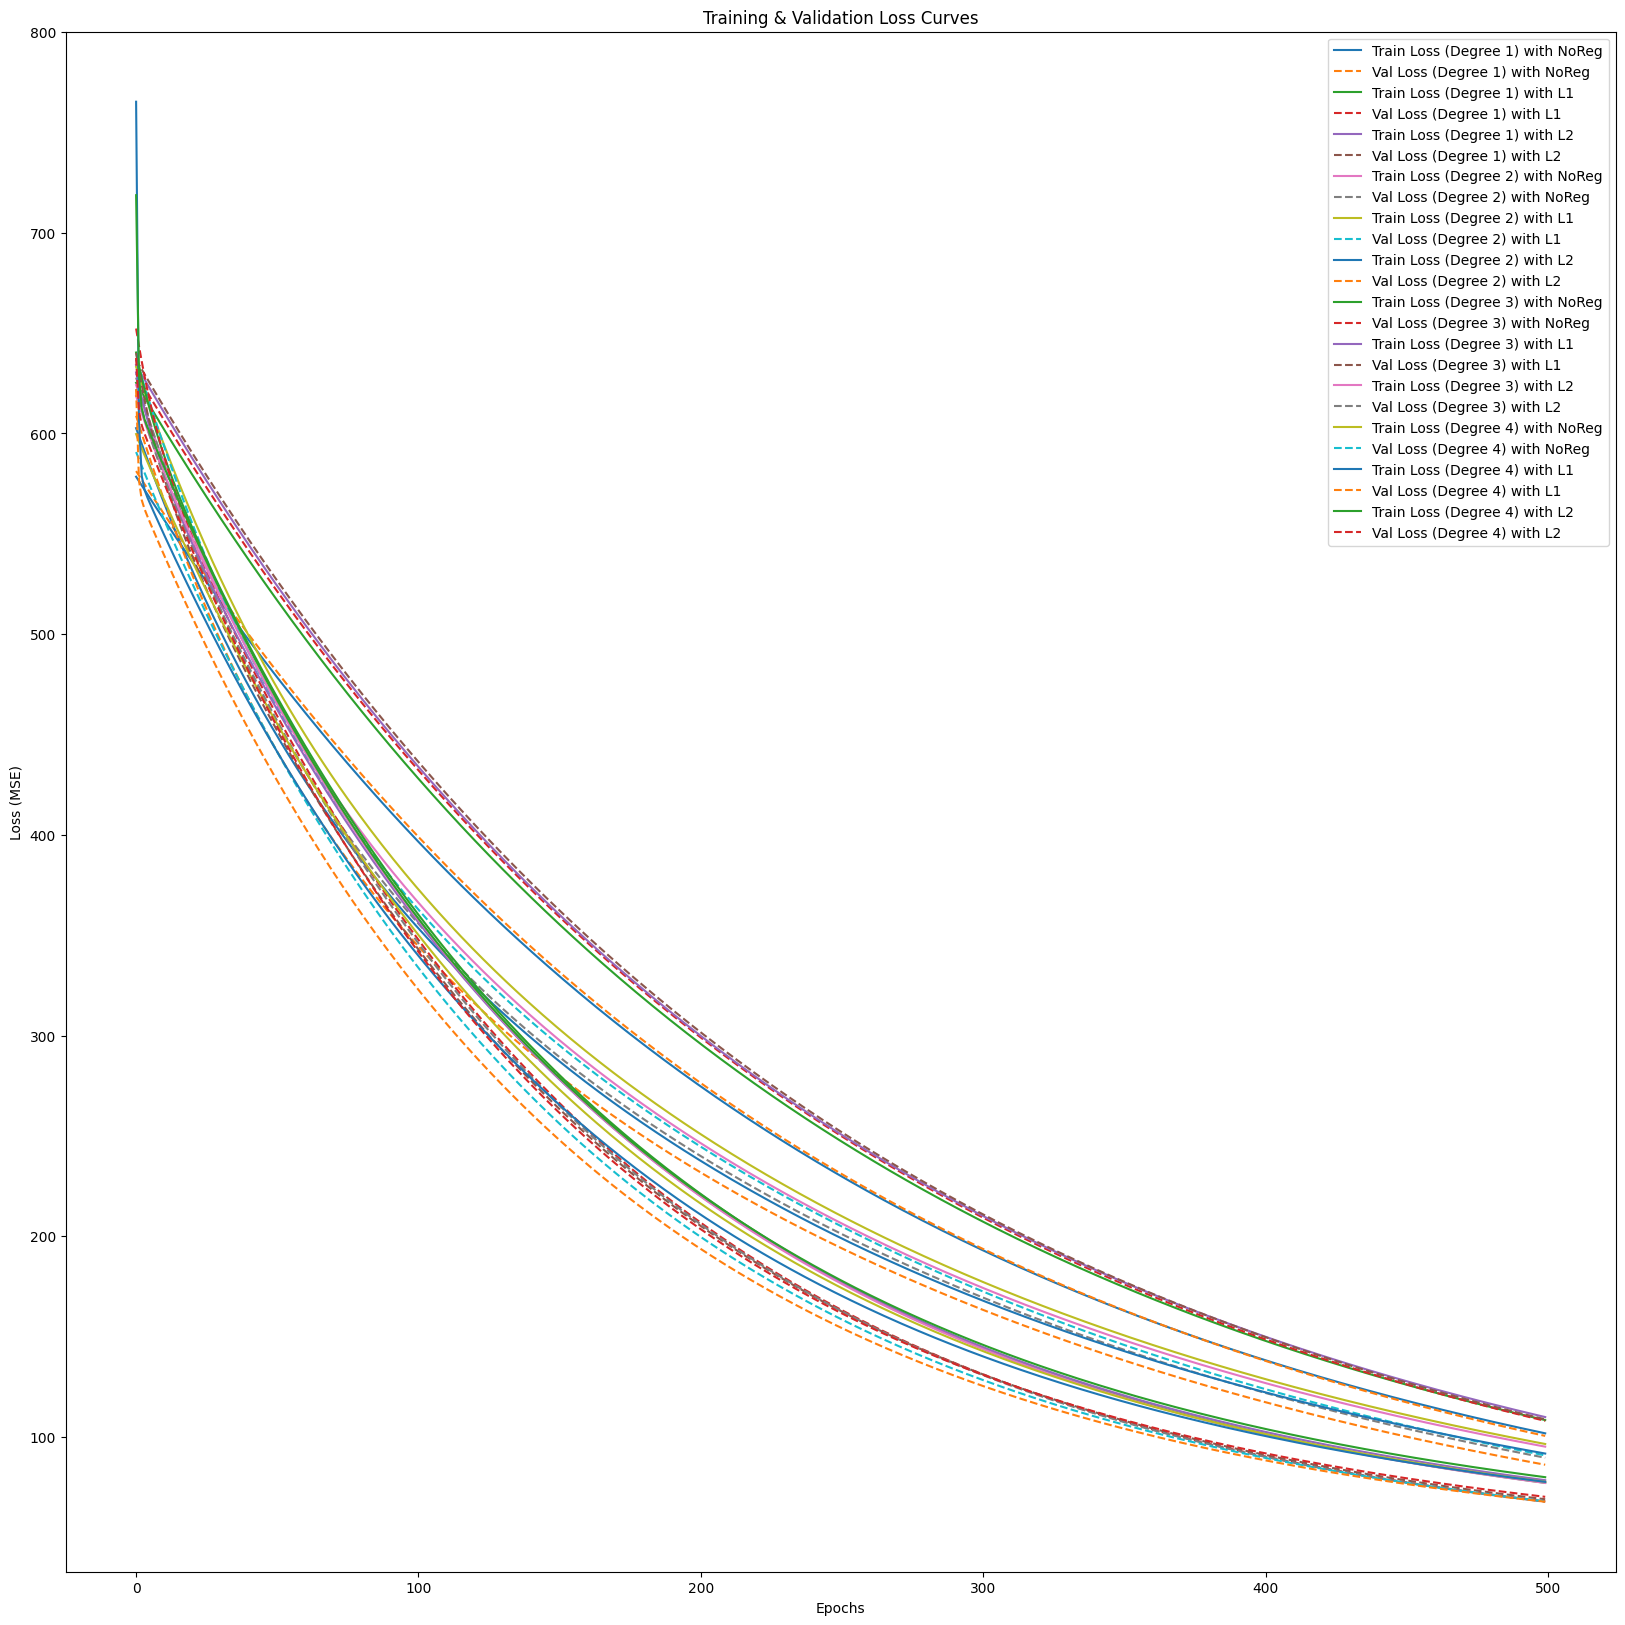

In [83]:
plt.figure(figsize=(20, 20))

for degree in range(1, 5):
    for reg in regularization_types:
      reg_name = reg if reg else "NoReg"
      train_losses, val_losses = losses[(degree, reg_name)]
      plt.plot(train_losses, label=f"Train Loss (Degree {degree}) with {reg_name}")
      plt.plot(val_losses, linestyle="dashed", label=f"Val Loss (Degree {degree}) with {reg_name}")

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss Curves")
plt.legend()
plt.show()


## 4. Evaluting:

In [84]:
evaluation_results = {}

for (degree, reg_type), model in models.items():
    # Get predictions on test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_poly[degree])

    # Convert tensors to numpy
    y_pred_np = y_pred.numpy()
    y_test_np = y_test_tensor.numpy()

    # Compute metrics
    mse = mean_squared_error(y_test_np, y_pred_np)
    r2 = r2_score(y_test_np, y_pred_np)

    # Store results
    evaluation_results[(degree, reg_type)] = {"MSE": mse, "R²": r2}

    print(f"Degree {degree}, Regularization {reg_type}: MSE = {mse:.4f}, R² = {r2:.4f}")

Degree 1, Regularization NoReg: MSE = 100.4999, R² = -0.7511
Degree 1, Regularization L1: MSE = 108.0015, R² = -0.8818
Degree 1, Regularization L2: MSE = 108.7481, R² = -0.8949
Degree 2, Regularization NoReg: MSE = 89.6414, R² = -0.5619
Degree 2, Regularization L1: MSE = 90.7985, R² = -0.5821
Degree 2, Regularization L2: MSE = 86.1336, R² = -0.5008
Degree 3, Regularization NoReg: MSE = 67.8636, R² = -0.1825
Degree 3, Regularization L1: MSE = 68.9567, R² = -0.2015
Degree 3, Regularization L2: MSE = 67.7117, R² = -0.1798
Degree 4, Regularization NoReg: MSE = 67.9565, R² = -0.1841
Degree 4, Regularization L1: MSE = 67.7159, R² = -0.1799
Degree 4, Regularization L2: MSE = 70.1557, R² = -0.2224


In [85]:
best_model = min(evaluation_results, key=lambda x: evaluation_results[x]["MSE"])
print(f"\nBest Model: Polynomial Degree {best_model[0]} with {best_model[1]} Regularization")



Best Model: Polynomial Degree 3 with L2 Regularization


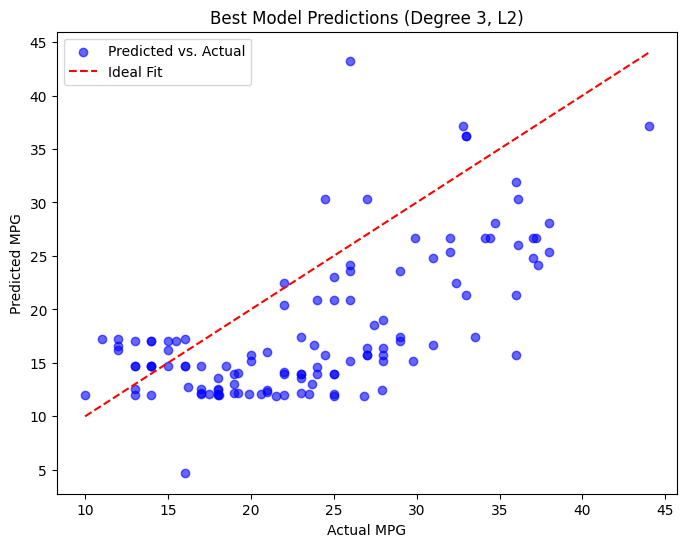

In [86]:
import matplotlib.pyplot as plt

best_degree, best_reg = best_model
best_model_instance = models[best_model]

# Get predictions from the best model
best_model_instance.eval()
with torch.no_grad():
    y_pred_best = best_model_instance(X_test_poly[best_degree]).numpy()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_best, alpha=0.6, label="Predicted vs. Actual", color="blue")
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], 'r--', label="Ideal Fit")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title(f"Best Model Predictions (Degree {best_degree}, {best_reg})")
plt.legend()
plt.show()
